#План действий:
- разберёмся с механикой вычисления PageRank на игрушечном примере,
- продемонстрируем особенности алгоритма и варианты реализации,
- перейдём к примерам связности реальных сетей.


Пусть $G_1$ - ориентированный граф, построенный по модели [Ravasz-Barabasi](https://arxiv.org/abs/cond-mat/0206130)

![](https://habrastorage.org/webt/_1/dr/4o/_1dr4o_7so8qhk2eddgv3zadqow.png)


> FIG. 1: The iterative construction leading to a hierarchical
network. Starting from a fully connected cluster of five nodes
shown in (a) (note that the diagonal nodes are also connected
– links not visible), we create four identical replicas, connecting the peripheral nodes of each cluster to the central node of
the original cluster, obtaining a network of N = 25 nodes (b).
In the next step we create four replicas of the obtained cluster,
and connect the peripheral nodes again, as shown in (c), to
the central node of the original module, obtaining a N = 125
node network. This process can be continued indefinitely.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! sudo apt-get install python3.7
! sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
! sudo update-alternatives --config python3
! sudo apt install python3-pip
! sudo apt install python3.7-distutils
! python -m pip install snap-stanford

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support
  python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3.7
  python3.7-minimal
0 upgraded, 6 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,698 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.7-minimal amd64 3.7.17-1+jammy1 [608 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.7-minima

In [ ]:
import sys
sys.path.append("/usr/local/lib/python3.7/dist-packages/")
import snap

In [ ]:
import snap
import numpy as np
import pandas as pd

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

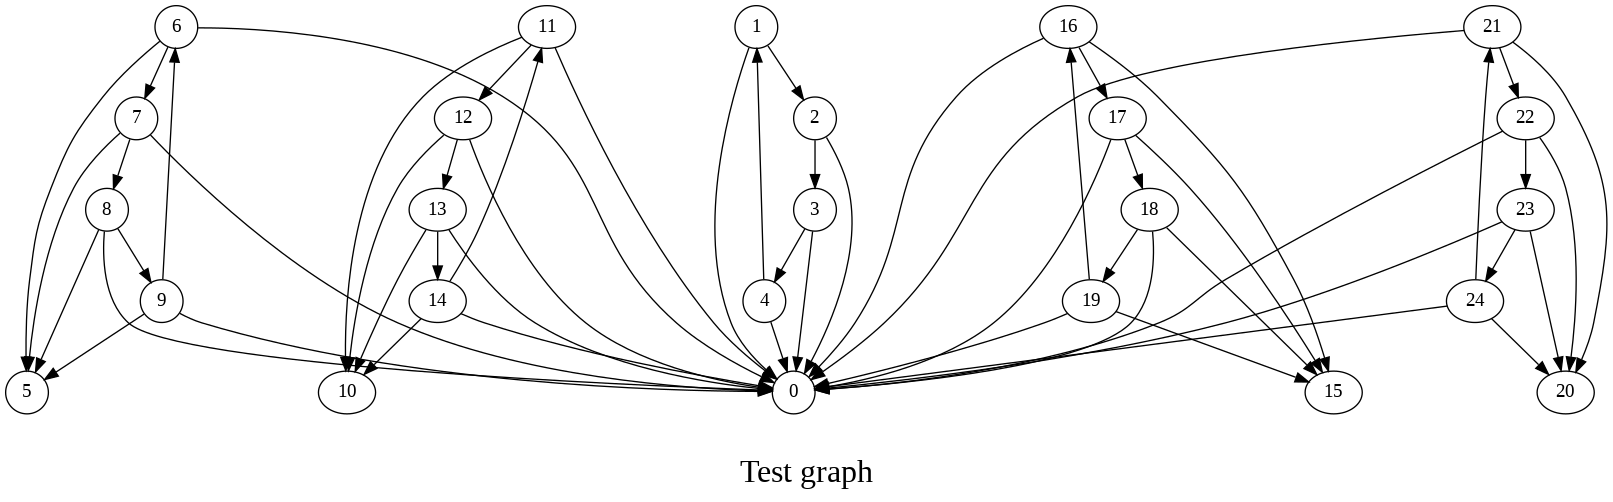

In [ ]:
G1 = snap.GenBaraHierar(snap.PNGraph, 1, True)
labels = snap.TIntStrH()
for Node in G1.Nodes():
    labels[Node.GetId()] = str(Node.GetId())
snap.DrawGViz(G1, snap.gvlDot, 'G1.png', 'Test graph', labels)
Image('G1.png')

In [ ]:
snap.PrintInfo(G1, 'Test graph', 'output.txt', False)
for line in open('output.txt').readlines():
    print (line.strip())

Test graph: Directed
Nodes:                    25
Edges:                    56
Zero Deg Nodes:           0
Zero InDeg Nodes:         0
Zero OutDeg Nodes:        5
NonZero In-Out Deg Nodes: 20
Unique directed edges:    56
Unique undirected edges:  56
Self Edges:               0
BiDir Edges:              0
Closed triangles:         36
Open triangles:           214
Frac. of closed triads:   0.144000
Connected component size: 1.000000
Strong conn. comp. size:  0.160000
Approx. full diameter:    4
90% effective diameter:  2.605469


## Библиотек для работы с графами - предостаточно
Альтернативой SNAP может оказаться более 'питоническая' [NetworkX](https://networkx.org/documentation/latest/index.html), поклонникам которой пригодится следующая функция:

In [ ]:
import networkx as nx

def snap_to_nx(Graph):
    #####################################################
    #  конвертер ориентированных графов
    #####################################################
    Graph.SaveEdgeList('mygraph.txt')
    GraphNX = nx.read_edgelist('mygraph.txt', create_using=nx.DiGraph)

    return GraphNX

# 0. Обход графа




## 0.0. Разминка [2]

   
<font color=white>.</font>

Вершина $i$ является соседом по графу для вершины $j$, если ребро $e(i,j) \in E$.  

<font color=white>.</font>

Обозначим $\Gamma(i)$ множество соседей вершины $v_i$.
  
<font color=white>.</font>

Cтепень вершины - это мощность множества её соседей:
  
<font color=white>.</font>

# $ d_i = |\Gamma(i)|$,
   
<font color=white>.</font>

Пусть для каждой вершины $v_i \in V$ графа $G_1$, начальное значение
  
<font color=white>.</font>

# $r_{i}^{(0)} = 1 / |V|$.

<font color=white>.</font>

Реализуйте вычисление ванильной формулировки PageRank итеративным методом:

# $r_j = \sum_{i \rightarrow j}{r_i / d_i }$.
   
<font color=white>.</font>
   
   
* Чему равно значение PageRank для вершины 2 после 2 итераций?

*Примечание: данное упражнение необязательно выполнять в коде, рекомендуем решить задачу на листочке т.к. на практике обходом графа PageRank вычисляют лишь в особых случаях.*

In [ ]:
import copy


def page_rank_iter(Graph, iters=2):
  n=Graph.CntNonZNodes()
  graph_map = {}
  graph_rank = {}
  initial_graph_rank = {}

  for i in range(n):
    graph_map[i] = set()
    graph_rank[i] = 1/n
    initial_graph_rank[i] = 0

  for EI in Graph.Edges():
    graph_map[EI.GetSrcNId()].add(EI.GetDstNId())

  for iter in range(iters):
    curr_graph_rank = copy.deepcopy(initial_graph_rank)
    for i in range(n):
      curr_list = list(graph_map[i])
      curr_n = len(curr_list)
      for j in curr_list:
        curr_graph_rank[j]+=graph_rank[i]/n
    graph_rank = curr_graph_rank


  return graph_rank


In [ ]:
graph_rank=graph_rank=page_rank_iter(G1)

In [ ]:
# а если вы всё-таки решились реализовать PageRank тремя разными способами, то разместите ваш код здесь

# 1. Ванильный PageRank и два сюрприза

Постройте столбцовую стохастическую матрицу для тестового графа $G_1$, руководствуясь правилом

# $\begin{align*}M_{ij} = \left\{
\begin{matrix}
\frac{1}{d_j} & \forall i,j \iff i \in \Gamma(j), \\
0 & \forall i,j \iff i \notin \Gamma(j).
\end{matrix}
\right.\end{align*}$

## 1.1. Матричные методы [3]

Найдите значения элементов:
- $M_{4,2}$
- $M_{0,22}$
- $M_{4,3}$

In [ ]:
def make_vanilla_transition_matrix(Graph):
    n = Graph.CntNonZNodes()
    M = np.zeros((n, n))
    for EI in Graph.Edges():
      M[EI.GetDstNId(), EI.GetSrcNId()] = 1
    col_smm = M.sum(0)
    col_smm[col_smm==0] = 1
    M = M / col_smm
    return M

In [ ]:
M = make_vanilla_transition_matrix(G1)

## 1.2. Первый сюрприз [5]
Ванильная реализация чувствительна к тупикам (вершинам с одними только входящими рёбрами) - через них PageRank "утекает" из системы. Реализуйте вычисление степенным методом (power iteration)

# $r = Mr$

и определите, сколько итераций потребуется, чтобы из системы "утекло" 80% PageRank

In [ ]:
def compute_naive_pagerank(Graph):
    M = make_vanilla_transition_matrix(Graph)
    n = Graph.CntNonZNodes()
    r = np.array([1/n for i in range(n)])
    r = M.dot(r)

    return r

In [ ]:
M = make_vanilla_transition_matrix(G1)
n = G1.CntNonZNodes()
r = np.array([1/n for i in range(n)])
iter = 0
while np.sum(r)> 0.2:
  r = M.dot(r)
  iter+=1

print(iter)

3


Исправим ситуацию с тупиками добавлением исходящих рёбер вершинам 0, 5, 10, 15 и 20, после чего в графе не останется вершин без исходящих рёбер.

PageRank теперь никуда не утечёт!

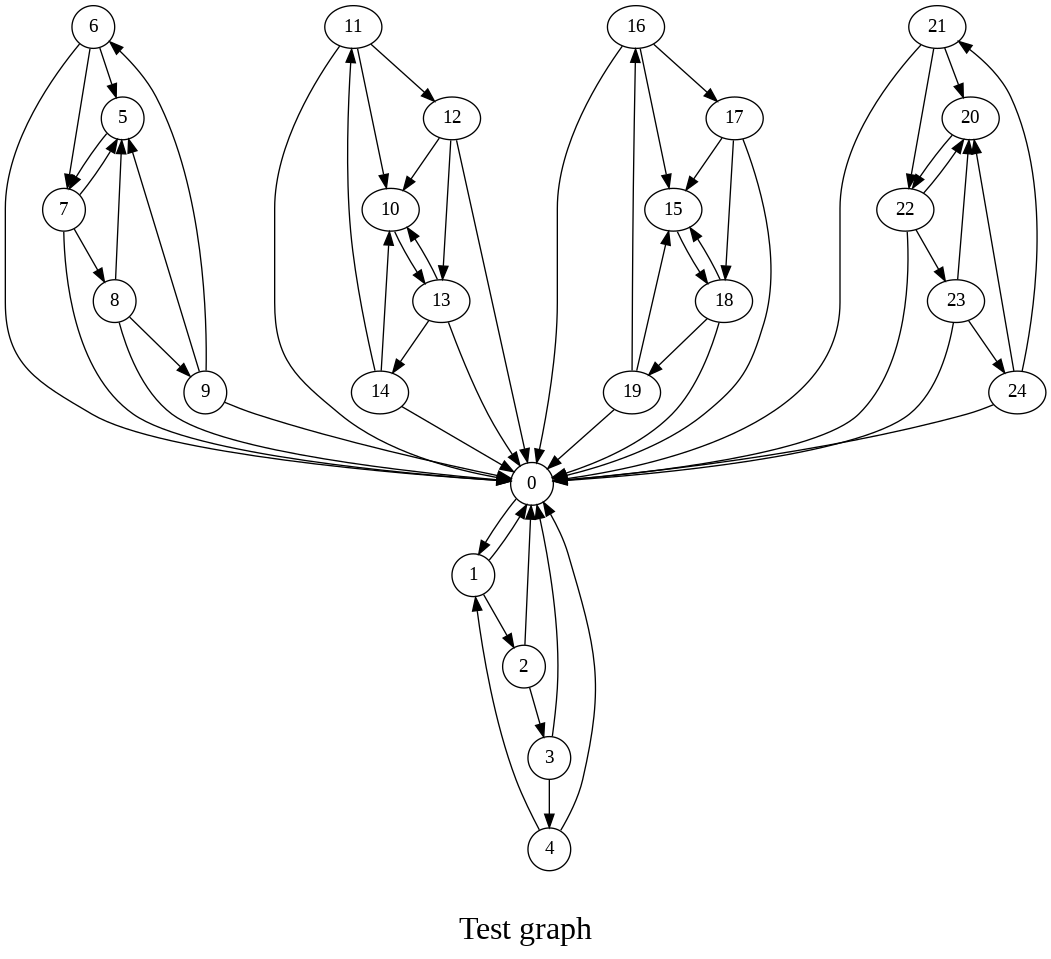

In [ ]:
G1.AddEdge(0,1)
G1.AddEdge(5,7)
G1.AddEdge(10,13)
G1.AddEdge(15,18)
G1.AddEdge(20,22)

snap.DrawGViz(G1, snap.gvlDot, 'G1.png', 'Test graph', labels)
Image('G1.png')

## 1.3 Качество решения [7]
Пусть требуемая точность $\epsilon = 0.01$ и критерий остановки

<font color=white>.</font>
  
# $||r^{(t+1)} - r^{(t)}||_1 < \epsilon $,
  
<font color=white>.</font>
  
$||x||_1 = \sum_{k} |x_k|$ - это $L_1$ норма (или [дистанция Минковского](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).
   
<font color=white>.</font>

Пусть для каждой вершины $v_i \in V$ графа $G_1$, начальное значение
  
<font color=white>.</font>

# $r_{i}^{(0)} = 1 / |V|$.
    
<font color=white>.</font>

- Сколько итераций потребуется для стабилизации вектора значений PageRank?

In [ ]:
from scipy.spatial import distance

def compute_vanilla_pagerank(Graph, epsilon=0.01):
    M = make_vanilla_transition_matrix(G1)
    n = G1.CntNonZNodes()
    r = np.array([1/n for i in range(n)])
    r_prev= np.array([n for i in range(n)])
    iter = 0
    while distance.minkowski(r, r_prev) >= 0.01:
      r_prev = r
      r= M.dot(r)
      iter+=1

    return iter

In [ ]:
print(compute_vanilla_pagerank(G1, epsilon=0.01))

11


# 2. PageRank с телепортом

Брин и Пейдж решили вопрос с тупиками и паучьими гнёздами, переписав матрицу переходов в виде

# $ M^{\star} = \beta M + (1-\beta) [1/n]_{n×n} $

<font color=white>.</font>

## 2.1 PageRank с телепортом [7]

Реализуйте матрицу переходов $M^{\star}$, учитывающую фактор телепортации, приняв $\beta = 0.85$.




In [ ]:
def make_transition_matrix(Graph, beta=0.85):
    M = make_vanilla_transition_matrix(Graph)
    n = Graph.CntNonZNodes()
    M_b = M*beta
    M_b_n = (1-beta)*(1/n)*np.ones((n, n))
    MStar = M_b + M_b_n

    return MStar

In [ ]:
MStar=make_transition_matrix(G1, beta=0.85)

Пусть для каждой вершины $v_i \in V$ графа $G_1$, начальное значение
  
<font color=white>.</font>

# $r_{i}^{(0)} = 1 / |V|$.

    
<font color=white>.</font>

- Чему равно $k$ - количество итераций, которое потребуется для стабилизации вектора значений PageRank c точностью $\epsilon = 0.01$?

<font color=white>.</font>

Из условия инициализации вектора значений средним арифметическим очевидно что $\sum_{i}{r_i^{(0)}} = 1$.

<font color=white>.</font>

- Найдите $\sum_{i}{r_i^{(k)}}$

<font color=white>.</font>

# (Внимание: PageRank всё ещё утекает)

# для наглядности вернём большой слив (вершина с индексом 0)

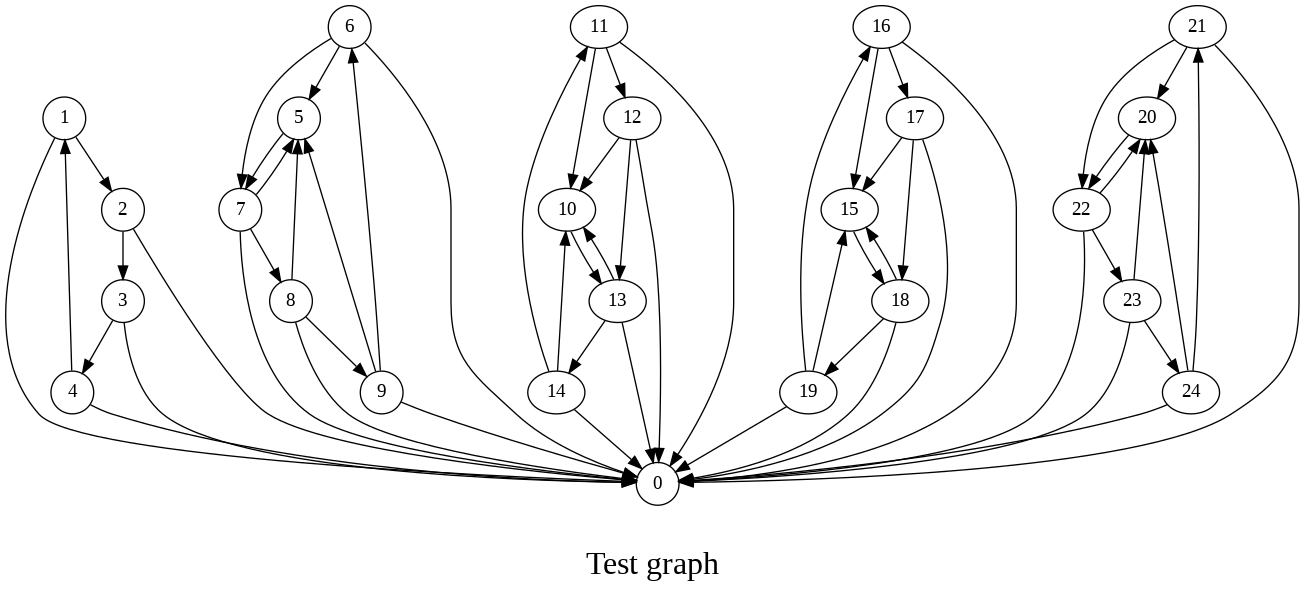

In [ ]:
G1.DelEdge(0,1)
snap.DrawGViz(G1, snap.gvlDot, 'G1.png', 'Test graph', labels)
Image('G1.png')

In [ ]:
def compute_not_so_vanilla_pagerank(Graph, epsilon=0.01):
    M = make_transition_matrix(Graph,)
    n = Graph.CntNonZNodes()
    r = np.array([1/n for i in range(n)])
    print(np.sum(r))
    r_prev= np.array([n for i in range(n)])
    iter = 0
    while distance.minkowski(r, r_prev) >= 0.01:
      r_prev = r
      r= M.dot(r)
      print(np.sum(r))
      iter+=1

    return r, iter

In [ ]:
r, iter= compute_not_so_vanilla_pagerank(G1, epsilon=0.01)
print(iter)
print(np.sum(r))

1.0
0.966
0.7489666666666668
0.6112606222222223
0.4923691735185185
0.4009313485504321
0.32571556097309623
0.2652944587930585
0.21600405750229004
0.1759821368710663
0.14337069844249262
10
0.14337069844249262


- Насколько адекватен ситуации используемый критерий остановки? Поясните в нескольких предложениях.

## 2.2. Подливка [5]

Формулировка Брина и Пейджа предполагает отсутствие тупиков в графе.

В заданиях 1.2 и 2.1 показано как через них PageRank "утекает" из системы. Т.е.

# $\sum r^{(t)} - \sum r^{(t+1)} > 0 $,

Справиться с этим явлением можно равномерно добавляя "утекшее" после каждой итерации. Убедитесь, что
# $\sum_{v_i \in V}{r_i^{(t+1)}} = 1$.

- Чему равно значение PageRank для вершины 0 после 42 итераций?


In [ ]:
def compute_pagerank(Graph, epsilon=0.01):

    M = make_transition_matrix(Graph,)
    n = Graph.CntNonZNodes()
    r = np.array([1/n for i in range(n)])
    r_prev= np.array([n for i in range(n)])
    iter = 0

    while distance.minkowski(r, r_prev) >= 0.01:
      r_prev = r
      r= M.dot(r)
      sum_r = np.sum(r)
      diff = 1 - sum_r
      r += diff/n

      iter+=1

    return r, iter

In [ ]:
r, iter= compute_pagerank(G1, epsilon=0.01)
print(iter)
print(r)

5
[0.19892398 0.02223933 0.02223933 0.02223933 0.02223933 0.04951453
 0.01872602 0.05917351 0.02980042 0.02081519 0.04951453 0.02081519
 0.01872602 0.05917351 0.02980042 0.04951453 0.02081519 0.01872602
 0.05917351 0.02980042 0.04951453 0.01872602 0.05917351 0.02980042
 0.02081519]


# А что там в коробке?

In [ ]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G1, PRankH)
for item in PRankH:
    print(item, PRankH[item])

0 0.19684072872246602
1 0.022074335868668513
2 0.022074335868668513
3 0.022074335868668513
4 0.022074335868668513
5 0.04934738186505694
6 0.018670812429889518
7 0.0599260766434585
8 0.029672270126340466
9 0.021098940885969607
10 0.04934738186505694
11 0.021098940885969607
12 0.018670812429889518
13 0.0599260766434585
14 0.029672270126340466
15 0.04934738186505694
16 0.021098940885969607
17 0.018670812429889518
18 0.0599260766434585
19 0.029672270126340466
20 0.04934738186505694
21 0.018670812429889518
22 0.0599260766434585
23 0.029672270126340466
24 0.021098940885969607


# 3. Знакомство с бродягой

PageRank - это стационарное распределение случайного блуждания.


## 3.1. Марковский процесс [8]

Пусть находящийся в вершине графа бродяга с вероятностью $\beta $ выбирает исходящее ребро и переходит в соседнюю верщину, а с вероятностью $1 - \beta $ - перемещается в случайно выбранную вершину. Из тупика - всегда телепортируется.

<font color=white>.</font>

Зададим значение $\beta \approx 0.85 $ (персонаж делает 5-7 шагов между телепортациями).

<font color=white>.</font>

Доля посещений отдельных вершин будет стремиться к значению PageRank. Убедимся в этом

In [ ]:
import copy


def page_rank_iter(Graph, iters=2):
  n=Graph.CntNonZNodes()
  graph_map = {}
  graph_rank = {}
  initial_graph_rank = {}

  for i in range(n):
    graph_map[i] = set()
    graph_rank[i] = 1/n
    initial_graph_rank[i] = 0

  for EI in Graph.Edges():
    graph_map[EI.GetSrcNId()].add(EI.GetDstNId())

  for iter in range(iters):
    curr_graph_rank = copy.deepcopy(initial_graph_rank)
    for i in range(n):
      curr_list = list(graph_map[i])
      curr_n = len(curr_list)
      for j in curr_list:
        curr_graph_rank[j]+=graph_rank[i]/n
    graph_rank = curr_graph_rank


  return graph_rank


In [ ]:
def random_walk(Graph, beta=0.85, epsilon=0.01, seed=42, steps=4200):
    np.random.seed(seed)
    n = Graph.CntNonZNodes()
    walk_counter = np.zeros(n)
    #for i in range(n):
    #  walk_counter[i] = 0
    M = make_vanilla_transition_matrix(Graph)
    start_walk = np.random.choice(n)
    walk_counter[start_walk]+=1

    for iter in range(steps):
      randomizer = np.random.choice(10)
      if randomizer < beta*10:
        curr_probs = M[:, start_walk]
        non_zero_ins, = np.where(curr_probs != 0)
        if len(non_zero_ins)==0:
          start_walk = np.random.choice(n)
        else:
          start_walk = np.random.choice(non_zero_ins)
      else:
        start_walk = np.random.choice(n)

      walk_counter[start_walk]+=1

    return np.array(walk_counter)

In [ ]:
walk_counter = random_walk(G1, steps=10000)

In [ ]:
print(walk_counter/np.sum(walk_counter))
print(walk_counter/np.sum(walk_counter) - r)

[0.20547945 0.01919808 0.02059794 0.01949805 0.02139786 0.04289571
 0.01619838 0.0539946  0.02889711 0.01949805 0.05069493 0.0209979
 0.01849815 0.06239376 0.02829717 0.04879512 0.02339766 0.01869813
 0.06229377 0.03049695 0.05319468 0.01959804 0.0639936  0.02919708
 0.02179782]
[ 6.55546868e-03 -3.04124750e-03 -1.64138748e-03 -2.74127749e-03
 -8.41467475e-04 -6.61882097e-03 -2.52763612e-03 -5.17891334e-03
 -9.03309709e-04 -1.31714473e-03  1.18039911e-03  1.82705288e-04
 -2.27866092e-04  3.22024675e-03 -1.50324972e-03 -7.19410906e-04
  2.58246531e-03 -2.78860901e-05  3.12025675e-03  6.96530307e-04
  3.68014914e-03  8.72023919e-04  4.82008676e-03 -6.03339706e-04
  9.82625296e-04]
